# Capstone Project: The quality of life in International Financial Centres
### Applied Data Science Capstone IBM/Coursera

## Table of contents
* [Introduction: Background and Interest](#introduction)
* [Data sourcing](#data)

## Introduction: Background and Interest <a name="introduction"></a>

What is a Financial Centre? It is an area with a high concentration and diversity of financial services. Some of those services are:

* Banking services (commercial, investments, securities exchanges)
* Insurance
* Tax planning
* Fund management

The Financial Institutions (FI) that populate those areas have on their liabilities, funds from suppliers located in various part of the world. Moreover, their counterparties (to whom they lend money, for example) are indistinguishable between resident and non-resident. In other words, on both sides of their balance sheet, the external exposure has a higher weight than the domestic one. The IMF (International Monetary Funds) defines three categories of FC:

* **International Financial Centres (IFC)**: are large international **full-service** centers with **advanced settlement and payments systems**, supporting large domestic economies, with deep and liquid markets where both **the sources and uses of funds are diverse**, and where legal and regulatory frameworks are adequate to safeguard the integrity of principal-agent relationships and supervisory functions.

* **Regional Financial Centres (RFC)**: differ from the first category, in that they have developed financial markets and infrastructure and intermediate funds in and out of their region, but have relatively small domestic economies.

* **Offshore Financial Centres (OFC)**: can be defined as a third category that are mainly much smaller, and provide more limited specialist services.

So according to this definition, three traits make a Financial Centre: full-service, advanced settlement and payments systems and a high diversity of the sources and uses of funds. From this definition, we can already identify some IFC and RFC. On one hand, London, New York and Tokyo would be classify as IFC. On the other hand, Hong Kong (香港) and Singapore (新加坡) would be classify as RFC due to their small domestic economies. *(for the remainder of this analysis, we will not distinguish IFC and RFC by calling both of them IFC)*

However, some disrupting events have fallen upon some of these IFCs specifically. Indeed, we can mention the **Brexit** which may (or may not) put an end to the hegemony of London among the European IFCs; or the Hong Kong protests which could undermine the "fragance harbor". And what about the consequences of the health crisis we are currently facing? Will it provoke some cities to fall from the IFC status and other to fall from it?

The Global Financial Centres Index identifies five (5) axis (Business environment, Human Capital, Infrastructure, Financial Sector development and Reputation) along which the IFCs can be compared. The objectif of this article is to understand one aspect of the Human Capital: the level of quality of life, in order to assess whether there is a disparity between those IFCs.

Even though the quality of life does not give a full picture, I think it may give to financial profesionnals and strategic planner (in Financial Institutions) an insight on where they should increase their presence.  

## Data sourcing <a name="data"></a>

In order to assess the quality of life in the IFCs, we will have to identify which are those IFCs. For that, we will use the report on the [**Global Financial Centres Index**](https://www.longfinance.net/media/documents/GFCI_27_Full_Report_2020.03.26_v1.1_.pdf) (March 2020). It presents all the IFCs and rank them.
Once we have the IFCs, we will use the **Geopy** to access the location of the center of each cities. 

Finally, for the quality of life we will use two databases:
1. the **Foursquare API** to get all the amenities present in the cities.
2. the [OECD Better Life Index 2017](https://www.kaggle.com/jej13b/oecd-better-life-index) will give us an idea on the affordability  of housing, the crime rate and the life expectancy

## Libraries

In [410]:
#!pip install geocoder
#!pip install folium
#!pip install geopandas
#!pip install geopy
from geopy.geocoders import Nominatim
#import geopandas as gpd
import geopy as gp
import pandas as pd
import numpy as np
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import re
import sklearn
#import geocoder

locator = Nominatim(user_agent="myGeocoder")

from sklearn.decomposition import PCA

## Parameters 

In [30]:
# The code was removed by Watson Studio for sharing.

In [31]:
number_IFCs = 108

## Data collection

We need to import the list of the IFCs. We can get them from the report [**Global Financial Centres Index**](https://www.longfinance.net/media/documents/GFCI_27_Full_Report_2020.03.26_v1.1_.pdf). 

In [32]:
df_data = pd.read_csv("C:\\Users\\whax\\Documents\\formation\\IBM_data_science_in_python\\IFC.csv")
df_data.columns=["Cities"]
df_data.head()

,Cities
0,New York
1,London
2,Tokyo
3,Shanghai
4,Singapore


In [33]:
df_data_1 = df_data[0:number_IFCs]
print('We collected {} Financial centres. However, we will analyse the {} first'.format(len(df_data),number_IFCs))

We collected 108 Financial centres. However, we will analyse the 108 first


Now, we have to get their location (latitude and longitude) with the library **Geopy**

In [34]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(locator.geocode,min_delay_seconds=1)
locations = df_data_1["Cities"].apply(geocode)

In [35]:
# loc = (adress,(latitude, longitude))
tuple_loc = locations.apply(lambda loc: tuple(loc))
df_data_1[["adress","coord"]]=pd.DataFrame(tuple_loc.tolist())
df_data_1[['latitudes','longitudes']]=pd.DataFrame(df_data_1.coord.tolist())

c:\users\whax\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:2960: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [36]:
df_data_1.head(10)

,Cities,adress,coord,latitudes,longitudes
0,New York,"New York, United States of America","(40.7127281, -74.0060152)",40.712728,-74.006015
1,London,"London, Greater London, England, SW1A 2DX, Uni...","(51.5073219, -0.1276474)",51.507322,-0.127647
2,Tokyo,"東京都, 日本 (Japan)","(35.6828387, 139.7594549)",35.682839,139.759455
3,Shanghai,"上海市, China 中国","(31.2322758, 121.4692071)",31.232276,121.469207
4,Singapore,Singapore,"(1.357107, 103.8194992)",1.357107,103.819499
5,Hong Kong,"香港島 Hong Kong Island, 香港 Hong Kong, China 中国","(22.2793278, 114.1628131)",22.279328,114.162813
6,Beijing,"北京市, 东城区, 北京市, 100010, China 中国","(39.906217, 116.3912757)",39.906217,116.391276
7,San Francisco,"San Francisco, San Francisco City and County, ...","(37.7790262, -122.4199061)",37.779026,-122.419906
8,Geneva,"Genève, Switzerland","(46.2017559, 6.1466014)",46.201756,6.146601
9,Los Angeles,"Los Angeles, Los Angeles County, California, U...","(34.0536909, -118.2427666)",34.053691,-118.242767


In [37]:
df_data_1.to_csv("locations.csv")

We use the Foursquare API to gather some information on the venues present in each cities

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name,end=" ")
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
IFC_used = df_data_1
IFC_venues = getNearbyVenues(names=IFC_used['Cities'],
                                   latitudes=IFC_used.latitudes,
                                   longitudes=IFC_used.longitudes,
                             radius=30000
                             
                                  )

New York London Tokyo Shanghai Singapore Hong Kong Beijing San Francisco Geneva Los Angeles Shenzhen Dubai Frankfurt Zurich Paris Chicago Edinburgh Luxembourg Guangzhou Sydney Melbourne Vancouver Toronto Washington DC Boston Montreal Amsterdam Stockholm Hamburg Dublin Wellington Stuttgart Seoul Brussels Copenhagen Tel Aviv Munich Vienna Abu Dhabi Calgary Casablanca Milan Madrid Kuala Lumpur Mumbai Prague Cayman Islands Doha Jersey Warsaw Busan Tallinn Rome Liechtenstein Almaty Bahrain Baku Bangkok Osaka British Virgin Islands Oslo Sofia Bermuda Mauritius Glasgow Vilnius Cyprus Helsinki New Delhi Riga Moscow Nur-Sultan Guernsey Chengdu Taipei Lisbon Isle of Man Mexico City Istanbul Cape Town San Diego GIFT City-Gujarat Sao Paulo Budapest Johannesburg Monaco Nairobi Riyadh Rio de Janeiro Gibraltar Kuwait City Reykjavik Jakarta Panama Tehran Athens St Petersburg Hangzhou Qingdao Tianjin Nanjing Dalian Manila Santiago Bahamas Buenos Aires Malta Barbados 

In [51]:
IFC_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York,40.712728,-74.006015,9/11 Memorial North Pool,40.712077,-74.013187,Memorial Site
1,New York,40.712728,-74.006015,Crown Shy,40.706187,-74.007490,Restaurant
2,New York,40.712728,-74.006015,Washington Market Park,40.717046,-74.011095,Playground
3,New York,40.712728,-74.006015,The Rooftop @ Pier 17,40.705463,-74.001598,Music Venue
4,New York,40.712728,-74.006015,Black Fox Coffee Co.,40.706573,-74.008155,Coffee Shop


In [52]:
IFC_venues.groupby("Neighborhood").get_group("Hong Kong").reset_index()

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,500,Hong Kong,22.279328,114.162813,Hong Kong Park Aviary (香港公園觀鳥園),22.277140,114.161399,Zoo
1,501,Hong Kong,22.279328,114.162813,The Upper House (奕居),22.277499,114.166323,Hotel
2,502,Hong Kong,22.279328,114.162813,The Asia Society Hong Kong Center (亞洲協會香港中心),22.276141,114.165263,Non-Profit
3,503,Hong Kong,22.279328,114.162813,Hong Kong Park (香港公園),22.277700,114.161854,Park
4,504,Hong Kong,22.279328,114.162813,Mandarin Grill + Bar (文華扒房＋酒吧),22.281928,114.159408,Steakhouse
...,...,...,...,...,...,...,...,...
95,595,Hong Kong,22.279328,114.162813,Din Tai Fung (鼎泰豐),22.279036,114.186185,Dumpling Restaurant
96,596,Hong Kong,22.279328,114.162813,Mammy Pancake (媽咪雞蛋仔),22.278017,114.186510,Snack Place
97,597,Hong Kong,22.279328,114.162813,The Eslite Spectrum (誠品生活),22.294385,114.168893,Department Store
98,598,Hong Kong,22.279328,114.162813,Amber,22.280613,114.157725,French Restaurant


Text(0, 0.5, 'Venues')

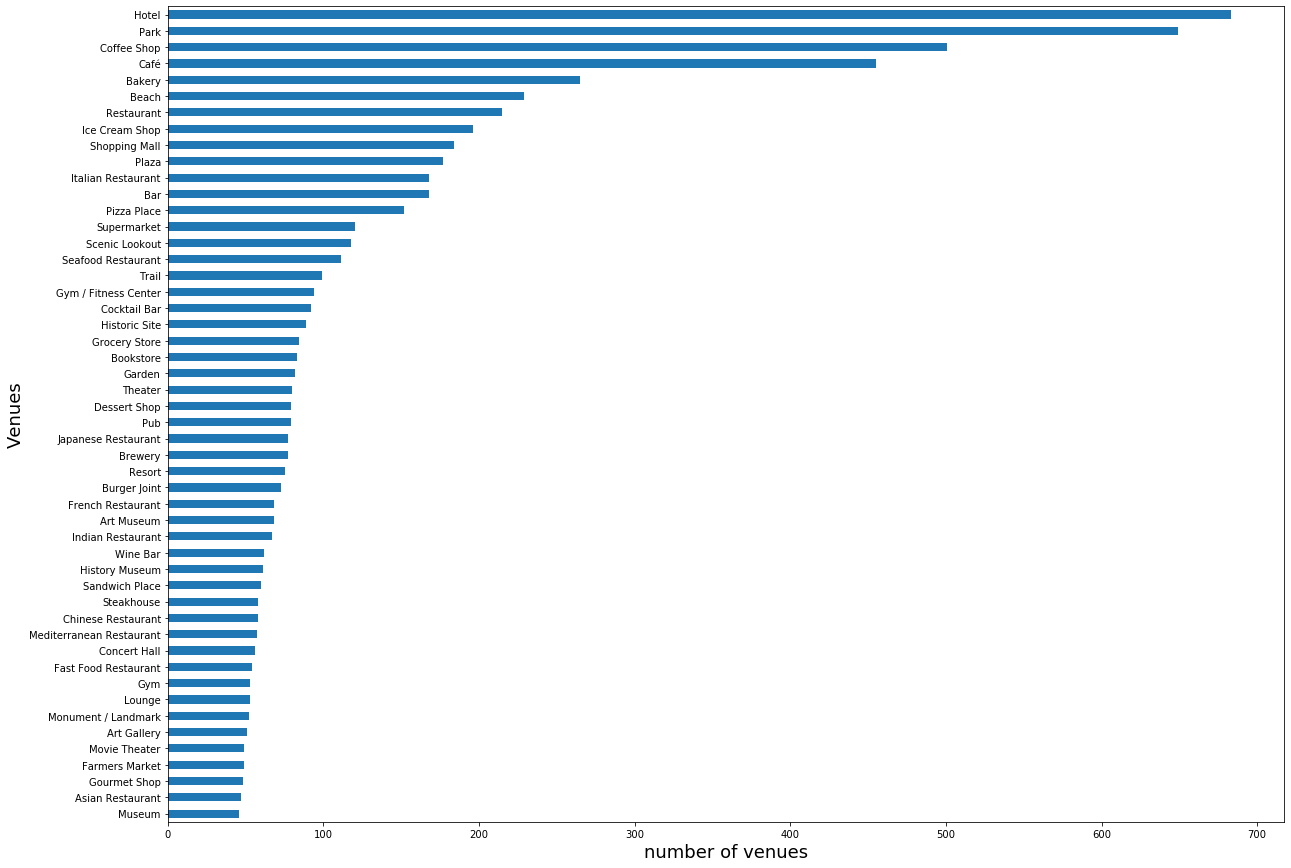

In [254]:
num_cat=50
df = IFC_venues["Venue Category"].value_counts()[:num_cat].sort_values(ascending=True)

ax=df.plot(kind="barh",figsize=(20,15))
ax.set_xlabel("number of venues",fontsize=18)
ax.set_ylabel("Venues",fontsize=18)

Les hotels, les parks et les cafés sont très représentés

Text(0, 0.5, 'Venues')

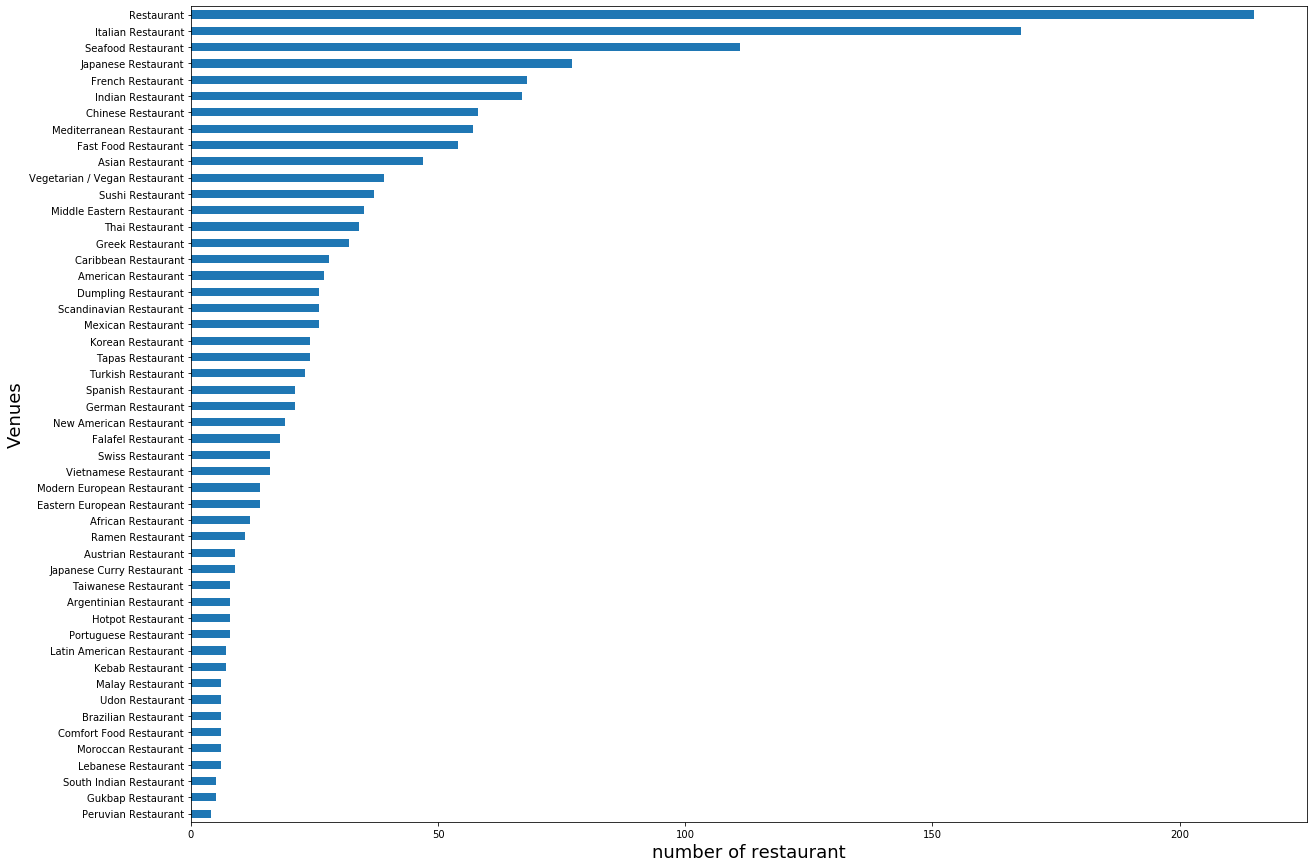

In [279]:
df1 = IFC_venues[[bool(re.search("Restaurant",x)) for x in IFC_venues["Venue Category"]]]
df=df1["Venue Category"].value_counts()[:num_cat].sort_values(ascending=True)
ax=df.plot(kind="barh",figsize=(20,15))
ax.set_xlabel("number of restaurant",fontsize=18)
ax.set_ylabel("Venues",fontsize=18)

In [309]:
df1.head()
data = df1[["Neighborhood","Venue Category"]].drop_duplicates().groupby(["Neighborhood"]).agg({"Venue Category":"count"})
data.sort_values(by="Venue Category",ascending=False)

,Venue Category
Neighborhood,
Washington DC,21
Tokyo,18
Hong Kong,16
Jakarta,14
Beijing,14
...,...
Tehran,2
Istanbul,2
London,1


In [53]:
IFC_onehot = pd.get_dummies(IFC_venues[["Venue Category"]],prefix="",prefix_sep="")
IFC_onehot["Neighborhood"] = IFC_venues["Neighborhood"]

In [54]:
IFC_grouped = IFC_onehot.groupby("Neighborhood").mean()

In [55]:
IFC_grouped.head(8)

,Abruzzo Restaurant,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,...,Wine Shop,Winery,Women's Store,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Zoo Exhibit
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Abu Dhabi,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
Almaty,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.010309,...,0.010309,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
Amsterdam,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.01,0.0
Athens,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
Bahamas,0.0,0.0,0.0,0.0,0.0,0.00,0.5,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
Bahrain,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.030000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
Baku,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
Bangkok,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0


## Principal Component Analysis

In [62]:
pca=PCA(n_components = 106)
pca.fit(IFC_grouped)

PCA(copy=True, iterated_power='auto', n_components=106, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

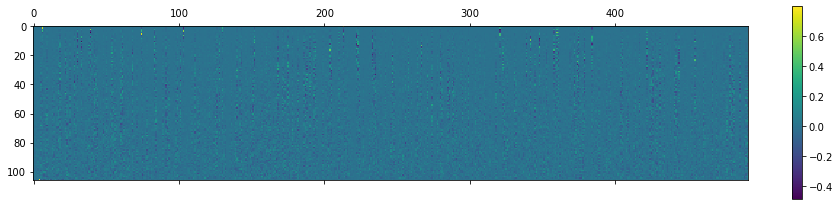

In [63]:
plt.matshow(pca.components_,cmap="viridis")
plt.colorbar()
plt.show()

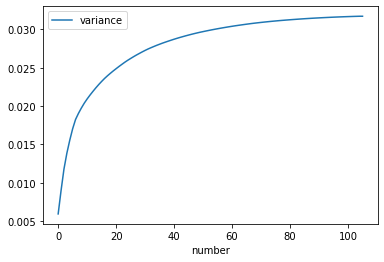

In [66]:
pd.DataFrame({"variance":pca.explained_variance_.cumsum(),"number":range(0,106)}).plot(kind="line",x="number",y="variance")

La variance expliquée est très faible

In [67]:
IFC_grouped.T.head()

Neighborhood,Abu Dhabi,Almaty,Amsterdam,Athens,Bahamas,Bahrain,Baku,Bangkok,Barbados,Beijing,...,Tianjin,Tokyo,Toronto,Vancouver,Vienna,Vilnius,Warsaw,Washington DC,Wellington,Zurich
Abruzzo Restaurant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
Accessories Store,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
Adult Boutique,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
Advertising Agency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
Afghan Restaurant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0


In [132]:
temp = IFC_grouped.T
num_top_venues = 20 
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

result=pd.DataFrame(columns=columns)
result['Neighborhood']=temp.columns.values
for i in range(0,temp.shape[1]):
    venues = pd.DataFrame(temp.iloc[:,i]).sort_values(by=temp.columns.values[i],ascending=False).index.values[:num_top_venues]
    #line = [temp.columns.values[i]]
    #line.extend(venues.tolist())
    result.iloc[i,1:] = venues.tolist()

In [133]:
pd.DataFrame(temp.iloc[:,5]).sort_values(by=temp.columns.values[5],ascending=False).index.values[:10]

array(['Coffee Shop', 'Café', 'Hotel', 'Middle Eastern Restaurant',
       'Restaurant', 'Shopping Mall', 'Burger Joint',
       'American Restaurant', 'Beach', 'Garden'], dtype=object)

In [134]:
result = result.set_index("Neighborhood")

In [135]:
result.loc[["Singapore","Hong Kong","Paris","New York"]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,,,,,
Singapore,Hotel,Park,Japanese Restaurant,Scenic Lookout,Performing Arts Venue,Cocktail Bar,Wine Bar,Italian Restaurant,Café,Garden,Indian Restaurant,Ice Cream Shop,Bookstore,Shopping Mall,Botanical Garden,Cosmetics Shop,Dessert Shop,Clothing Store,Chinese Restaurant,Waterfront
Hong Kong,Hotel,Café,Japanese Restaurant,Dumpling Restaurant,Park,Shopping Mall,Italian Restaurant,Thai Restaurant,Coffee Shop,Snack Place,Bar,Bakery,Supermarket,Gym / Fitness Center,Cocktail Bar,Beer Store,Electronics Store,Yoga Studio,Scenic Lookout,French Restaurant
Paris,Hotel,Park,Plaza,Garden,Art Museum,French Restaurant,Bakery,Cheese Shop,Indie Movie Theater,Historic Site,Monument / Landmark,Cupcake Shop,Concert Hall,Pedestrian Plaza,Ice Cream Shop,Dessert Shop,Pizza Place,Bookstore,Fountain,Forest
New York,Park,Ice Cream Shop,Bakery,Gourmet Shop,Pizza Place,Bookstore,Italian Restaurant,Movie Theater,Pier,Coffee Shop,Yoga Studio,Wine Shop,Restaurant,Scenic Lookout,Cocktail Bar,Bridge,Israeli Restaurant,Brewery,Pilates Studio,Beach


In [150]:
result_onehot = pd.get_dummies(result,prefix="",prefix_sep="")


In [217]:
#!pip install prince
import prince
mca_=prince.MCA(n_components=10)
mca_.fit(result)


MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=10,
    n_iter=10, random_state=None)

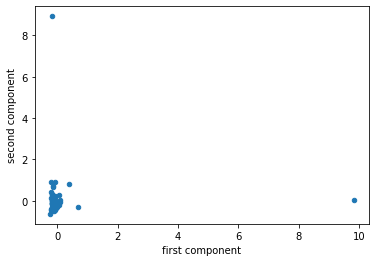

In [218]:
test = mca_.transform(result)
graph = test.iloc[:,[0,1]]
graph.columns = ["first component","second component"]
graph.plot(kind="scatter",x="first component",y="second component")

In [237]:
mca_.explained_inertia_

[0.015293396067798523,
 0.013563387342343266,
 0.013329578055302363,
 0.012311806613298004,
 0.01213298351816178,
 0.01208369239140437,
 0.01203925883434187,
 0.011916276785955844,
 0.011748328383176878,
 0.011648276017007728]

In [184]:
test[test["second component"]>8]

,first component,second component
Panama,-0.085518,8.416193


In [186]:
test[test["first component"]>8]

,first component,second component
Bahamas,9.79172,0.250288


In [191]:
result.loc["Panama"]

1st Most Common Venue                      River
2nd Most Common Venue                 Restaurant
3rd Most Common Venue                    Airport
4th Most Common Venue                Supermarket
5th Most Common Venue             Scenic Lookout
6th Most Common Venue                      Hotel
7th Most Common Venue                     Hostel
8th Most Common Venue            Photography Lab
9th Most Common Venue                   Pharmacy
10th Most Common Venue          Pedestrian Plaza
11th Most Common Venue        Photography Studio
12th Most Common Venue                 Piano Bar
13th Most Common Venue                 Pet Store
14th Most Common Venue               Pet Service
15th Most Common Venue                  Pet Café
16th Most Common Venue       Peruvian Restaurant
17th Most Common Venue        Persian Restaurant
18th Most Common Venue     Performing Arts Venue
19th Most Common Venue    Peking Duck Restaurant
20th Most Common Venue        Abruzzo Restaurant
Name: Panama, dtype:

In [192]:
result.loc["Bahamas"]

1st Most Common Venue                    Airport
2nd Most Common Venue                      Hotel
3rd Most Common Venue                      Diner
4th Most Common Venue         Abruzzo Restaurant
5th Most Common Venue                  Pet Store
6th Most Common Venue      Performing Arts Venue
7th Most Common Venue         Persian Restaurant
8th Most Common Venue        Peruvian Restaurant
9th Most Common Venue                   Pet Café
10th Most Common Venue               Pet Service
11th Most Common Venue           Photography Lab
12th Most Common Venue                  Pharmacy
13th Most Common Venue          Pedestrian Plaza
14th Most Common Venue        Photography Studio
15th Most Common Venue                 Piano Bar
16th Most Common Venue                  Pie Shop
17th Most Common Venue    Peking Duck Restaurant
18th Most Common Venue               Pastry Shop
19th Most Common Venue            Pilates Studio
20th Most Common Venue                Pastelaria
Name: Bahamas, dtype

In [313]:
result= result[[x not in ["Bahamas","Panama"] for x in result.index.values]]

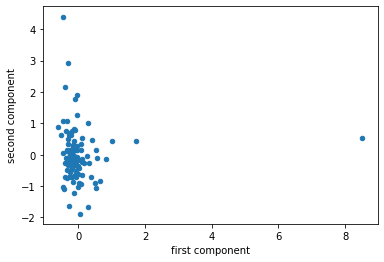

In [314]:
mca_.fit(result)
test = mca_.transform(result)
graph = test.iloc[:,[0,1]]
graph.columns = ["first component","second component"]
graph.plot(kind="scatter",x="first component",y="second component")

In [318]:
graph[graph["first component"]>8]

,first component,second component
Tokyo,8.516369,0.523837


In [346]:
result.loc["Tokyo"]

1st Most Common Venue                        Garden
2nd Most Common Venue                         Hotel
3rd Most Common Venue                    Art Museum
4th Most Common Venue                     BBQ Joint
5th Most Common Venue            Chinese Restaurant
6th Most Common Venue            Italian Restaurant
7th Most Common Venue                 Wagashi Place
8th Most Common Venue                History Museum
9th Most Common Venue     Japanese Curry Restaurant
10th Most Common Venue          Japanese Restaurant
11th Most Common Venue              Udon Restaurant
12th Most Common Venue          Tonkatsu Restaurant
13th Most Common Venue                          Pub
14th Most Common Venue              Buddhist Temple
15th Most Common Venue           Seafood Restaurant
16th Most Common Venue                 Concert Hall
17th Most Common Venue           Kaiseki Restaurant
18th Most Common Venue             Ramen Restaurant
19th Most Common Venue                         Park
20th Most Co

In [347]:
pd.DataFrame(result_onehot.sum().loc[result.loc["Tokyo"].to_list()]).reset_index().groupby("index").sum()

,0
index,
Art Museum,18
BBQ Joint,6
Buddhist Temple,2
Chinese Restaurant,16
Concert Hall,24
Garden,19
History Museum,17
Hotel,90
Italian Restaurant,45


In [349]:
pd.DataFrame(result_onehot.sum().loc[result.loc["Singapore"].to_list()]).reset_index().groupby("index").sum()

,0
index,
Bookstore,22
Botanical Garden,3
Café,82
Chinese Restaurant,16
Clothing Store,9
Cocktail Bar,27
Cosmetics Shop,3
Dessert Shop,21
Garden,19


Tokyo is extremely different from the other cities. the venues present in Tokyo like *Tonkatsu Restaurant* are not present elsewhere.

In [364]:
MCA_result=pd.DataFrame(test)
print(MCA_result.shape)
MCA_result.head()

(104, 10)


,0,1,2,3,4,5,6,7,8,9
Abu Dhabi,0.393188,0.469028,-0.166319,-0.180512,-0.045784,0.408740,0.518889,-0.225754,-0.393988,-0.457456
Almaty,-0.072740,-0.523835,0.251800,-0.446876,0.213526,-0.231626,-0.070420,0.890833,2.588630,-0.093910
Amsterdam,-0.348362,0.104698,-0.590145,0.007923,0.909383,-0.139693,-0.764966,-0.342241,-0.045725,0.127450
Athens,-0.246716,0.675176,-0.505214,-0.050498,-0.065484,0.123213,0.710015,-0.460824,-0.034653,1.172235
Bahrain,0.109248,-0.149964,0.122475,-0.123426,0.041703,0.066145,0.163743,0.089285,0.099447,0.267039


In [433]:

df_data_3 = pd.read_csv("C:\\Users\\whax\\Documents\\formation\\IBM_data_science_in_python\\Coursera_Capstone-1\\assets\\notebook\\worldcities.csv",sep=";")

df_data_3 = df_data_3[["city","country"]].set_index("city")

test = MCA_result.merge(df_data_3,how="left",left_index=True,right_index=True)
test.head()

,0,1,2,3,4,5,6,7,8,9,country
Abu Dhabi,0.393188,0.469028,-0.166319,-0.180512,-0.045784,0.408740,0.518889,-0.225754,-0.393988,-0.457456,United Arab Emirates
Almaty,-0.072740,-0.523835,0.251800,-0.446876,0.213526,-0.231626,-0.070420,0.890833,2.588630,-0.093910,Kazakhstan
Amsterdam,-0.348362,0.104698,-0.590145,0.007923,0.909383,-0.139693,-0.764966,-0.342241,-0.045725,0.127450,Netherlands
Athens,-0.246716,0.675176,-0.505214,-0.050498,-0.065484,0.123213,0.710015,-0.460824,-0.034653,1.172235,Greece
Bahrain,0.109248,-0.149964,0.122475,-0.123426,0.041703,0.066145,0.163743,0.089285,0.099447,0.267039,NaN


## OECD Data

In [438]:
df_data_2 = pd.read_csv("C:\\Users\\whax\\Documents\\formation\\IBM_data_science_in_python\\Coursera_Capstone-1\\assets\\notebook\\OECDBLI2017cleanedcsv.csv")
print(df_data_2.shape)
df_data_2.head()

(39, 25)


,Country,Dwellings without basic facilities as pct,Housing expenditure as pct,Rooms per person as rat,Household net adjusted disposable income in usd,Household net financial wealth in usd,Labour market insecurity as pct,Employment rate as pct,Long-term unemployment rate as pct,Personal earnings in usd,...,Water quality as pct,Stakeholder engagement for developing regulations as avg score,Voter turnout as pct,Life expectancy in yrs,Self-reported health as pct,Life satisfaction as avg score,Feeling safe walking alone at night as pct,Homicide rate as rat,Employees working very long hours as pct,Time devoted to leisure and personal care in hrs
0,Australia,1.1,20,2.3,33417,57462,4.3,72,1.36,52063,...,92,2.7,91,82.5,85,7.3,63.6,1.0,13.20,14.35
1,Austria,1.0,21,1.6,32544,59574,2.7,72,1.94,48295,...,93,1.3,75,81.3,70,7.0,80.7,0.4,6.78,14.55
2,Belgium,2.3,21,2.2,29968,104084,4.8,62,3.98,49587,...,84,2.2,89,81.1,75,6.9,70.7,1.0,4.31,15.77
3,Canada,0.2,22,2.5,29850,85758,3.9,73,0.81,48403,...,91,3.0,68,81.5,88,7.3,80.9,1.4,3.73,14.41
4,Chile,9.4,18,1.9,16588,21409,8.1,62,2.02,28434,...,69,1.5,49,79.1,57,6.7,51.1,4.5,10.06,14.90


In [408]:
df_data_2=df_data_2[["Country","Housing expenditure as pct","Employment rate as pct","Life expectancy in yrs","Homicide rate as rat","Time devoted to leisure and personal care in hrs"]]
df_data_2.head()

,Country,Housing expenditure as pct,Employment rate as pct,Life expectancy in yrs,Homicide rate as rat,Time devoted to leisure and personal care in hrs
0,Australia,20,72,82.5,1.0,14.35
1,Austria,21,72,81.3,0.4,14.55
2,Belgium,21,62,81.1,1.0,15.77
3,Canada,22,73,81.5,1.4,14.41
4,Chile,18,62,79.1,4.5,14.90


In [425]:
scale = sklearn.preprocessing.StandardScaler()
df_data_trans = scale.fit_transform(df_data_2.iloc[:,1:6])
.head()

In [442]:
df_data_trans = pd.DataFrame(df_data_trans)
df_data_trans["Country"]=df_data_2.Country
df_data_trans = df_data_trans.merge(test.reset_index(),left_on="Country",right_on="country",how="right").fillna(0).drop(["Country","country"],axis=1).set_index("index")

## Model K-means

In [452]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_data_trans)




In [453]:
kmeans.__dict__.keys()

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'precompute_distances', 'n_init', 'verbose', 'random_state', 'copy_x', 'n_jobs', 'algorithm', 'cluster_centers_', 'labels_', 'inertia_', 'n_iter_'])

In [456]:
test["label"]=kmeans.labels_.tolist()

In [459]:
test[test["label"]==2]

,0,1,2,3,4,5,6,7,8,9,country,label
Cyprus,-0.325576,0.492368,-0.420689,-0.403175,0.123416,-0.038374,-0.08741,0.245158,0.955563,0.378509,NaN,2
